# Introduction

Instacart is a grocery delivery platform where customers can place an order and have it delivered, similar to Uber Eats and DoorDash. The dataset provided has been modified from the original version. We reduced its size to make calculations faster and introduced missing and duplicate values. Care was taken to preserve the original data distributions when making these changes.

You must complete three steps. For each one, write a brief introduction that clearly reflects how you intend to solve each step, and write explanatory paragraphs that justify your decisions as you progress in your solution. Also, write a conclusion that summarizes your findings and choices.


## Data Dictionary

There are five tables in the dataset, and you will need to use all of them for data preprocessing and exploratory data analysis. Below is a data dictionary listing the columns of each table and describing the data they contain.

- `instacart_orders.csv`: each row corresponds to an order in the Instacart application.
    - `'order_id'`: unique ID number identifying each order.
    - `'user_id'`: unique ID number identifying each customer account.
    - `'order_number'`: the number of times this customer has placed an order.
    - `'order_dow'`: the day of the week the order was placed (0 if Sunday).
    - `'order_hour_of_day'`: the hour of the day the order was placed.
    - `'days_since_prior_order'`: the number of days since this customer’s previous order.
- `products.csv`: each row corresponds to a unique product that customers can purchase.
    - `'product_id'`: unique ID number identifying each product.
    - `'product_name'`: name of the product.
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'department_id'`: unique ID number identifying each grocery department.
- `order_products.csv`: each row corresponds to an item ordered within an order.
    - `'order_id'`: unique ID number identifying each order.
    - `'product_id'`: unique ID number identifying each product.
    - `'add_to_cart_order'`: the sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'aisle'`: name of the aisle.
- `departments.csv`
    - `'department_id'`: unique ID number identifying each grocery department.
    - `'department'`: name of the department.

# Step 1. Data Description

Read the data files (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` and `/datasets/order_products.csv`) with `pd.read_csv()` using the appropriate parameters to correctly read the data. Verify the information for each DataFrame created.


## Solution Plan

Write your solution plan here for Step 1. Data Description.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt # import libraries
import numpy as np

In [2]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')# read datasets into DataFrames

In [3]:
display(df_orders)
df_orders.info() # show DataFrame information

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(df_products)
df_products.info()# show DataFrame information

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
display(df_aisles)
df_products.info()# show DataFrame information

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
display(df_departments)
df_departments.info()# show DataFrame information

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
display(df_order_products)
df_order_products.info()# show DataFrame information

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusions

Write your intermediate conclusions for Step 1. Data Description here.

It is evident that when displaying the different DataFrames automatically, an adjustment is needed to call them in a way that reflects a properly formatted DataFrame. Therefore, a modification is made in the call to display a DataFrame with separated and organized information, ready for further analysis.

Another aspect observed is that there is a correlation between the different datasets, which will allow for cross-referencing information to support decision-making.

# Step 2. Data Preprocessing

Preprocess the data as follows:

Verify and correct data types (for example, ensure that ID columns are integers).
Identify and fill in missing values.
Identify and remove duplicate values.
Make sure to explain what types of missing and duplicate values you found, how you filled or removed them, and why you used those methods. Why do you think these missing and duplicate values might have been present in the dataset?

## Solution Plan

Write your plan for Step 2. Data Preprocessing here.

## The general steps would be:

1. Validate each of the DataFrames by performing the main checks to ensure the information is correct.
2. Perform checks and cross-checks between the DataFrames to confirm or reject any hypotheses or new findings that need to be verified.
3. Visualize the data for better analysis.
4. Make decisions and improvements to the process.

### `orders` data frame

In [8]:
# Check for Duplicate Orders
dup_col = df_orders.duplicated().sum()#sThe duplicated function is called to check if there is any duplicate information in the entire DataFrame.
dup_col1 = df_orders[df_orders['order_id'].duplicated(keep=False)]['order_id'].tolist()#The duplicated order data is displayed.

print()
print("A total of:", dup_col, "duplicates")# The number of duplicates is shown.
print()
print("The list of duplicated orders are:")
print(dup_col1[:15]) #A list of the duplicated orders is displayed.
print()
print("Sample of duplicate checks:")
display(df_orders[df_orders['order_id']==1918001])# A check is performed to confirm if the entire row is identical.

display(df_orders[df_orders['order_id']==794638])# A check is performed to confirm if the entire row is identical.

display(df_orders[df_orders['order_id']==1112182])# A check is performed to confirm if the entire row is identical.


A total of: 15 duplicates

The list of duplicated orders are:
[1918001, 794638, 408114, 2845099, 794638, 1112182, 1782114, 2125197, 2160484, 2160484, 1918001, 1021560, 467134, 1919531, 2282673]

Sample of duplicate checks:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
230807,1918001,188546,14,3,2,16.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
164581,1112182,202304,84,3,2,6.0
273805,1112182,202304,84,3,2,6.0


Do you have duplicate rows? If yes, what do they have in common?

If duplicates appear in the orders DataFrame, a total of 15 duplicates are found, as shown in the code details above. The repeated orders are listed, and it is evident that the duplicated data is the entire order information. In the previous step, a check is performed on the duplicates to verify the information displayed, and indeed, the rows are completely repeated. Additionally, it is noted that the transactions occurred on Wednesday at 2 AM.

In [9]:
# Based on your findings, Verify all orders placed on Wednesday at 2:00 AM.
comp1 = df_orders[(df_orders['order_dow']== 3) & (df_orders['order_hour_of_day'] == 2)] #The filtering is performed based on the parameters for Wednesday at 2:00 AM. 
comp1.info()
print()
print("Se presentan: ", comp1.duplicated().sum(), "filas duplicados") #After checking this reduced DataFrame and applying the duplicated function,
#it is confirmed that all the duplicates are from this specific day and time frame. It is recommended to investigate what happened on this day and 
# make the necessary corrections.

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB

Se presentan:  15 filas duplicados


What does this result suggest?

By verifying the specified time frame of Wednesday at 2:00 AM, we find 121 records. A detailed check is performed by applying the duplicated function, as we hypothesize that all the duplicates fall within this time frame. After reapplying the duplicated function to this filtered DataFrame, it shows that the duplicated data from the entire DataFrame is concentrated and focused in this specific area. Therefore, it is recommended to investigate what happened during this time period and make the necessary corrections.

In [10]:
# Remove Duplicate Orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Verify again if there are any duplicate rows.
dup_col = df_orders.duplicated().sum()
print(dup_col)

0


In [12]:
# Verify again if there are only duplicate order IDs.
dup_ID = df_orders['order_id'].duplicated().sum()
print(dup_ID)

0


Briefly describe your findings and what you did with them:

It was established that during the time frame on Wednesday (3) at 2:00 AM (2), there was information with duplicate records, as 15 purchase codes appeared with duplicate information across the entire row. To make the necessary adjustments, identification and cleaning of these data were performed. This prevented distortion in the data. The duplicates were then removed, and a final check was done to ensure that no duplicates remained in the DataFrame.

### `products` data frame

In [13]:
# Verify if there are completely duplicate rows
print(df_products.duplicated().sum())

0


In [14]:
# Check only for duplicated department IDs
print(df_products['department_id'].value_counts(dropna=True).sort_index())

department_id
1     4008
2      548
3     1516
4     1684
5     1054
6     1139
7     4366
8      972
9     1858
10      38
11    6564
12     907
13    5372
14    1117
15    2092
16    3449
17    3085
18    1081
19    6264
20    1322
21    1258
Name: count, dtype: int64


In [15]:
# Check only for duplicated product names (convert the names to uppercase to compare them better)
df_products['product_name'] = df_products['product_name'].str.upper() #The column is converted to uppercase.
pn1= df_products['product_name'].value_counts() #Validation is performed to check how many times each product name is repeated.
print(pn1)
print()
print("A total of ", df_products.duplicated().sum(), "duplicated") #A check is performed to identify how many duplicates appear.
print()
display(df_products[df_products['product_name']=="GREEN TEA WITH GINSENG AND HONEY"])
#A repeated product name is extracted, and it is evident that the duplication occurs only in the product name. The rest of the information does 
#not repeat, as it has a different product_id.

product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64

A total of  0 duplicated



,product_id,product_name,aisle_id,department_id
2037,2038,GREEN TEA WITH GINSENG AND HONEY,94,7
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
19813,19814,GREEN TEA WITH GINSENG AND HONEY,94,7


In [16]:
# Check for duplicate product names that are not missing
print(df_products[df_products['product_name'].isna()])
#Missing values for product names are extracted, and it is evident that there are entries with no product name information. Additionally, it is 
# identified that all of these missing names are located in department 21.

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Briefly describe your findings and what you did with them.

It was established from this DataFrame that there are no duplicates, as each product has a unique ID. It was confirmed that there are 21 departments, and all products without a product name are concentrated in department 21. For analysis purposes, it was decided to exclude this department.

### `departments` data frame

In [17]:
# Check if there are completely duplicate rows
print("It´s ", df_departments.duplicated().sum(), "duplicated")
print()
print(df_departments[df_departments['department_id'].isna()])

It´s  0 duplicated

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Check only for duplicated department IDs
print(df_departments['department_id'].value_counts(dropna=True).sort_index())

department_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
Name: count, dtype: int64


Briefly describe your findings and what you did with them.

The DataFrame was verified, showing no duplicate information. It was confirmed from the products DataFrame that "all products without a product name or with missing information are concentrated in Department 21, which should be excluded from analysis." This department could be flagged for the company to clean up this information. Additionally, checks for duplicate and missing values were conducted, and none were found.

### `aisles` data frame

In [19]:
# Check if there are completely duplicate rows
print("It´s ", df_aisles.duplicated().sum(), "duplicated")

It´s  0 duplicated


In [20]:
# Check only for duplicated grocery IDs
print(df_aisles['aisle_id'].duplicated().sum())
print(df_aisles['aisle'].duplicated().sum())
print(df_aisles[df_aisles['aisle'].isna()])

0
0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Briefly describe your findings and what you did with them.

The DataFrame was checked and contains no duplicate information. Additionally, checks were conducted for duplicate and missing values, neither of which were found.

### `order_products` data frame

In [21]:
# Check if there are completely duplicate rows
print("It´s ", df_order_products.duplicated().sum(), "duplicated")

It´s  0 duplicated


In [22]:
# Check again for any other misleading duplicates
print(df_order_products['order_id'].duplicated().sum())
print()
print(df_order_products['product_id'].duplicated().sum())
print()
print(df_order_products['order_id'].value_counts(dropna=False))
print()
display(df_order_products[df_order_products['order_id']==61355])
print()
print(df_order_products['product_id'].value_counts(dropna=False))
print()
display(df_order_products[df_order_products['product_id']==24852])
print()
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

4094961

4499434

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64



,order_id,product_id,add_to_cart_order,reordered
57981,61355,5322,NaN,0
149404,61355,39475,45.0,0
247893,61355,8594,NaN,0
269840,61355,14233,5.0,0
345399,61355,24010,51.0,0
...,...,...,...,...
4426514,61355,29270,15.0,0
4482168,61355,24964,33.0,0
4515077,61355,6760,27.0,0
4521208,61355,16262,62.0,0



product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64



,order_id,product_id,add_to_cart_order,reordered
100,194806,24852,3.0,1
109,3176371,24852,1.0,1
151,1442232,24852,3.0,1
310,1400886,24852,4.0,0
362,1926105,24852,3.0,1
...,...,...,...,...
4544722,3006846,24852,2.0,1
4544731,2713872,24852,7.0,1
4544823,2774827,24852,2.0,1
4544842,3402221,24852,1.0,1



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


Brief Summary of Findings and Actions Taken

A validation of the DataFrame was conducted with the following steps:

    * A general check for duplicates in the entire DataFrame confirmed that no duplicates were present.
    * Column-specific checks showed repeated entries for order_id and product_id. However, these repeats reflect different products within the same order (order_id repeats) and individual products included in multiple orders (product_id repeats), which is expected and does not impact the analysis.
    * A final check of the add_to_cart_order column revealed some missing values, indicating that these products did not have a specific placement order within the cart for certain purchases.

## Find and Remove Missing Values

When working with duplicate values, we also observed some missing values that need further investigation:

* The `'product_name`' column in the products table.
* The `'days_since_prior_order`' column in the orders table.
* The `'add_to_cart_order`'column in the order_products table.

### `products` data frame

In [23]:
# Find the missing values in the 'product_name' column"
print(df_products[df_products['product_name'].isna()])
print()
print(df_products['product_name'].value_counts(dropna=False))

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                        

Briefly describe your findings.
Upon validating in two different ways and focusing on the missing values, it is established and confirmed as previously mentioned, where it was clarified that there is a department where data without results is concentrated.

In [24]:
#  ¿All missing product names are related to the aisle with ID 100.?

j1 = df_products[df_products['product_name'].isna()]
j1 = j1['aisle_id'].value_counts(dropna=False)
print(j1)
print()
j2 = df_aisles.iloc[99]
print(j2)

aisle_id
100    1258
Name: count, dtype: int64

aisle_id        100
aisle       missing
Name: 99, dtype: object


Briefly describe your findings: An 
extraction of information was performed, and all 1,258 missing data points in 'df_products' are related to aisle 100, which is associated with the 'missing' or 'lost' aisle."

In [25]:
# Are all missing product names related to the department with ID 21?
j3 = df_products[df_products['product_name'].isna()]
j3 = j3['department_id'].value_counts(dropna=False)
print(j3)
print()
j4 = df_departments.iloc[20]
print(j4)

department_id
21    1258
Name: count, dtype: int64

department_id         21
department       missing
Name: 20, dtype: object


Briefly describe your findings. 

An extraction of information was performed, and all 1,258 missing data points in 'df_products' are related to department 21, which is associated with the 'missing or lost' department."

In [26]:
# Use the department and aisle tables to check the data for aisle ID 100 and department ID 21
print(j2) # Extract the aisle data to identify what aisle ID 100 refers to, which indicates 'missing' or lost.
print()
print(j4) # Extract the department data to identify what department ID 21 refers to, which also indicates 'missing' or lost.

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


Briefly describe your findings.

Both codes are focused on identifying the 'missing' aisle and 'missing' department.

In [27]:
# Complete the missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products[df_products['product_name']=="Unknown"])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Briefly describe your findings and what you did with them.

The missing values are filled with the word 'Unknown' in order to establish and proceed with the following information analysis. Once replaced, they are incorporated into the dataframe.

### `orders` data frame

In [28]:
# Find the missing values
print(df_orders [df_orders ['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# Is there any missing value other than the customer's first order?
print(df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Briefly describe your findings and what you did with them.

Upon analyzing the missing values, it is determined that they appear in the orders dataframe, specifically in the column days_since_prior_order, as these correspond to the first order (order number 1). This indicates that the customers have not made any previous purchases, and it is their only purchase recorded in the system up to that point.
In the respective analysis, the first step was to validate which values were missing, focusing on the days_since_prior_order column. Then, a double filter was applied to identify the missing values, with a condition for orders greater than 1. It was found that all the missing values in days_since_prior_order correspond to first-time orders."

### `order_products` data frame

In [30]:
# Find the missing values
print(df_order_products [df_order_products ['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# What are the minimum and maximum values in this column?
print("The minimum and maximum values for the column add_to_cart_order are: ", min(df_order_products['add_to_cart_order'] ), "y ", max(df_order_products['add_to_cart_order'] ))
print()
print(df_order_products[df_order_products['order_id']==2449164])

The minimum and maximum values for the column add_to_cart_order are:  1.0 y  64.0

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
128360    2449164       14386                NaN          0
187426    2449164       32864               10.0          1
193859    2449164        8518                NaN          0
234913    2449164       24497               32.0          1
...           ...         ...                ...        ...
4279508   2449164        7781               55.0          1
4335855   2449164       25295               54.0          1
4407623   2449164        4920                NaN          1
4423417   2449164       35912                NaN          0
4480899   2449164       47759               11.0          1

[76 rows x 4 columns]


Briefly describe your findings.

Upon validating the information, it is established that for a specific order, a product was included without having a clearly defined order in which it was chosen. Additionally, it is found that the largest number of products included and registered in a single order was 64 items."

In [32]:
# Save all the order IDs that have a missing value in 'add_to_cart_order'.
c1 = df_order_products [df_order_products ['add_to_cart_order'].isna()]
c1 = c1['order_id']
print(c1)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# Do all the orders with missing values have more than 64 products?
# Group all the orders with missing data by their order ID.
# Count the number of 'product_id' in each order and check the minimum count value.
oinan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(oinan)
print()
grpoinan = df_order_products[df_order_products['order_id'].isin(oinan)]
print(grpoinan)
print()
s_pid= df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count()
print(s_pid)
print()
print("el valor minimo que se presenta es: ", s_pid.min())

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]

or

Briefly describe your findings.

Upon grouping the results, it is evident that the missing values are those products that were included in an order but did not have a specific order in which they were selected.

In [34]:
# Replace the missing values in the 'add_to_cart_order' column with 999 and convert the column to integer type.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
print(df_order_products)
print()
df_order_products.info()
print()
can_convert = np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int'))
print("El resultado de la validacion es", can_convert, "donde podemos realizar el cambio de la columna")
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print()
print(df_order_products.dtypes)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to

Briefly describe your findings and what you did with them.

The calculation and adjustment of missing values are performed, and they are replaced with a large number (999) for identification purposes, ensuring that they do not affect the flow of product data into the orders within the dataframe. Additionally, the column type is changed for better data analysis and merging between tables.

## Conclusions

Write your intermediate conclusions here about Step 2: Data Preprocessing.

After completing all the data preprocessing, the focus is placed on missing and duplicate values:

For these issues, the following actions were taken:

    - The dataframe was focused on to allow for action to prevent duplicates from appearing again, such as duplicate orders occurring on the same day and at the same time.
    - It was established that the dataframes, by default, contain missing or "NaN" values, particularly in the aisle and department columns, allowing for differentiation and better data focusing.
    - Missing values were handled to fill in the gaps, ensuring that the data merging would be reliable and support decision-making.

# Step 3. Data Analysis

Once the data is processed and ready, perform the following analysis:

# [A] Easy (all must be completed to pass)

1. Verify that the values in the`'order_hour_of_day'` and `'order_dow'` columns in the orders table are reasonable (i.e.,  `'order_hour_of_day'` hould range from 0 to 23 and `'order_dow'` should range from 0 to 6).
2. Create a chart showing the number of people placing orders depending on the time of day.
3. Create a chart showing which day of the week people make their purchases.
4. Create a chart showing the time people wait before making their next order, and comment on the minimum and maximum values.

### [A1] Verify that the values are reasonable

In [35]:
print(df_orders['order_hour_of_day'].describe())
print()
print("The hours range from:", min(df_orders['order_hour_of_day'] )," hours until", max(df_orders['order_hour_of_day'] )," hours")

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

The hours range from: 0  hours until 23  hours


In [36]:
print(df_orders['order_dow'].describe())
print()
print("The days range from the day:", min(df_orders['order_dow'] ),"which represents Sunday through to the day", max(df_orders['order_dow'] )," which represents Saturday")

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

The days range from the day: 0 which represents Sunday through to the day 6  which represents Saturday


It is established that the values are within the established ranges for hours and days, ensuring reliable analysis.

### [A2] For each hour of the day, how many people place orders?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


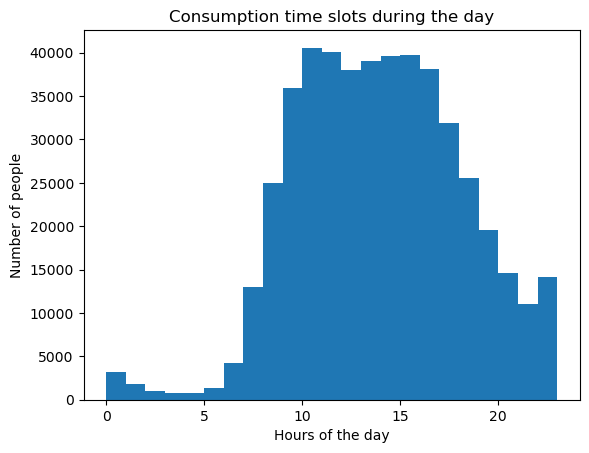

In [37]:
h_dia = df_orders.pivot_table(index='order_hour_of_day', #The column whose values are converted into rows in the pivot table;
                            columns='order_dow', #The column whose values are converted into columns in the pivot table
                            values='user_id', #The column whose values we want to aggregate in the pivot table;
                            aggfunc='count' #The aggregation function we want to apply to the values in each row and column group.
                           )
#print(h_dia)

deck_val = df_orders.groupby('order_hour_of_day')['user_id'].count()
print(deck_val)

                  
df_orders['order_hour_of_day'].plot(kind='hist', bins=23, x='order_hour_of_day', y='user_id', title='Consumption time slots during the day')
plt.ylabel('Number of people')
plt.xlabel('Hours of the day')
plt.show()

The time slot with the highest purchases is at 10 AM, where the peak is observed. Additionally, it is established that from 10 AM to 2 PM is the time slot with the highest activity, and this is where the process should be supported.

### [A3] Which day of the week do people buy groceries?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64
order_hour_of_day   0    1    2    3    4    5    6     7     8     9   ...  \
order_dow                                                               ...   
0                  533  337  188  128  108  171  463  1752  3908  5650  ...   
1                  565  269  145  104  104  246  757  2320  4751  7262  ...   
2                  462  240  136  104  109  196  653  1900  3485  5057  ...   
3                  373  215  106  101  108  170  643  1732  3125  4490  ...   
4                  324  229  114  109  100  198  594  1787  3136  4332  ...   
5                  459  219  123   99  118  229  654  1933  3373  4794  ...   
6                  464  254  177  125  118  161  451  1619  3246  4311  ...   

order_hour_of_day    14    15    16    17    18    19    20    21    22   23  
order_dow                                                                     
0              

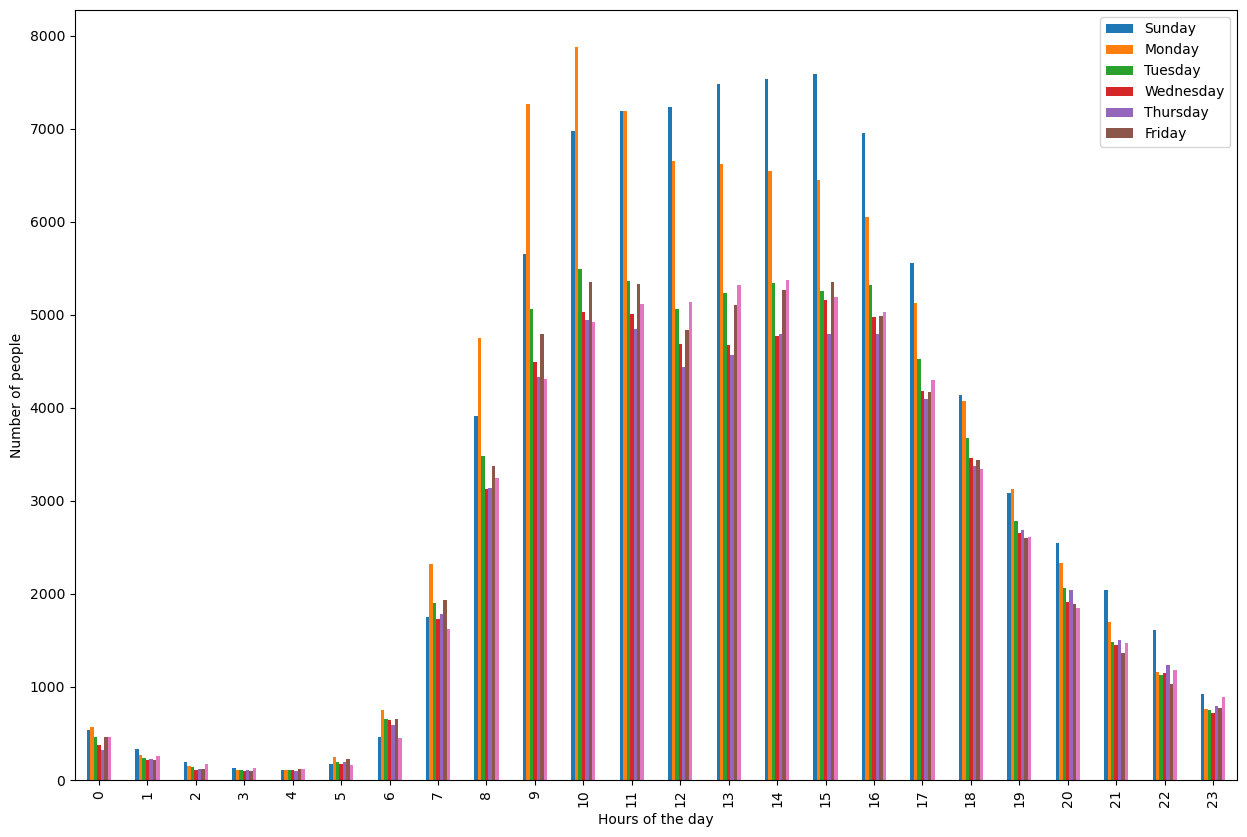

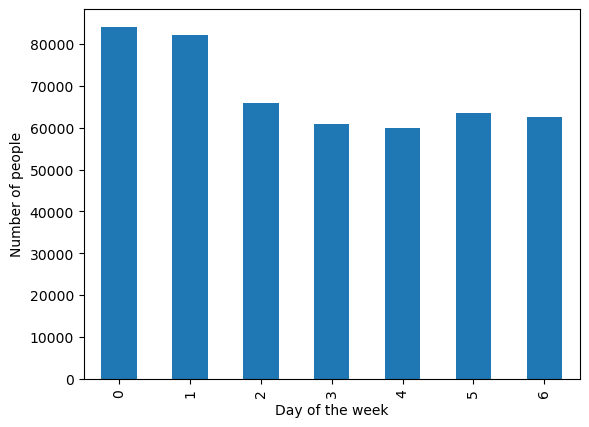

count        7.000000
mean     68421.714286
std      10247.547409
min      59810.000000
25%      61773.000000
50%      63488.000000
75%      74009.000000
max      84090.000000
Name: user_id, dtype: float64

In [38]:
deck_val2 = df_orders.groupby('order_dow')['user_id'].count()
print(deck_val2)

d_comp = df_orders.pivot_table(index='order_dow', #The column whose values are converted into rows in the pivot table;
                            columns='order_hour_of_day', #The column whose values are converted into columns in the pivot table;
                            values='user_id', #The column whose values we want to aggregate in the pivot table;
                            aggfunc='count' #The aggregation function we want to apply to the values in each row and column group.
                           )
print(d_comp)

h_dia.plot(kind='bar', figsize=[15, 10], xlabel="Hours of the day", ylabel="Number of people")
plt.legend(["Sunday" , "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.show()

deck_val2.plot(kind='bar', xlabel="Day of the week", ylabel="Number of people")
plt.show()


deck_val2.describe()


The day with the highest flow is established to be Sunday, while the day with the lowest purchases is Thursday. The average purchase amount is 68,421, as made by the buyers.

### [A4] How long do people wait before placing another order? Comment on the minimum and maximum values

order_dow                   0     1     2     3     4     5     6
days_since_prior_order                                           
0.0                      1277  1743  1352  1324  1343  1380  1170
1.0                      2630  2674  3709  3122  2920  2878  2246
2.0                      3730  3276  3729  5065  4367  4102  2869
3.0                      4270  4966  3292  4412  5375  4538  3371
4.0                      4611  5393  4358  3395  4371  5410  3468
5.0                      4547  5343  4404  4096  3241  4419  4046
6.0                      6068  5861  4198  3804  3905  3906  6188
7.0                     10486  9101  4587  4066  4202  5848  6287
8.0                      5107  4518  4334  2892  2759  2883  2868
9.0                      2644  2421  2651  2804  2287  2082  1864
10.0                     1969  2447  1612  1951  2088  1789  1453
11.0                     1749  2055  1692  1274  1568  1781  1348
12.0                     1665  1978  1565  1396  1098  1538  1418
13.0      

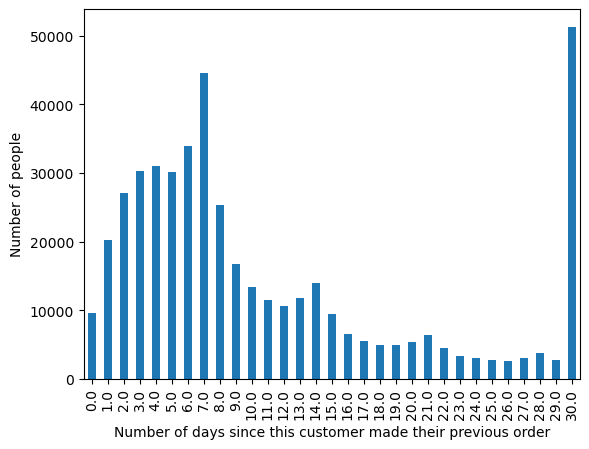

The minimum number of days that have passed since this customer made their previous order was: 29 days, with: 2640
The maximum number of days that have passed since this customer made their previous order was: 30 days, with: 51337


In [39]:
t_pedido = df_orders.pivot_table(index='days_since_prior_order', #The column whose values are converted into rows in the pivot table;
                            columns='order_dow', #The column whose values are converted into columns in the pivot table;
                            values='user_id', #The column whose values we want to aggregate in the pivot table;
                            aggfunc='count' #The aggregation function we want to apply to the values in each row and column group."
                           )

print(t_pedido)
print()
deck_val3 = df_orders.groupby('days_since_prior_order')['user_id'].count()
print(deck_val3)

deck_val3.plot(kind='bar', xlabel="Number of days since this customer made their previous order", ylabel="Number of people")
plt.show()

print("The minimum number of days that have passed since this customer made their previous order was: 29 days, with:", deck_val3.min())
print("The maximum number of days that have passed since this customer made their previous order was: 30 days, with:", deck_val3.max())

It is established that people tend to make their purchases in the long term. The data shows that people follow certain patterns when making their purchases, as follows: consumers tend to regularize their purchases or wait until a specific day, and the maximum value, which is 30, indicates that most consumers do wait to make their purchase, adhering to a 30-day cycle. This suggests that they regularize their purchases and reorder every 30 days.

Based on the information presented, the following could be happening in such behavior:

    * The system has a parameter where days exceeding 30 are by default set to 30, as supported by the fact that the peak occurs on this day.
    * The behavior of the days prior to day 8 shows a decrease, and it is atypical to see a sudden increase in a single moment.
Based on this information, it is recommended to zoom in on this detail to gather better data for decision-making and determine what is actually happening.

# [B] Intermediate (must be completed to pass)

1. Is there any difference between the distributions of `'order_hour_of_day'` on Wednesdays and Saturdays? Plot bar charts for `'order_hour_of_day'` for both days on the same figure and describe any differences you observe.
2. Plot the distribution for the number of orders placed by customers (i.e., how many customers made only 1 order, how many made 2, how many made 3, and so on...).
3. What are the 20 most frequently ordered products? Display their ID and name.

### [B1] Difference between Wednesday and Saturday for `'order_hour_of_day'`. Filter the dataframe with data specifically for Wednesday and Saturday for the analysis.

In [40]:
mys_com = df_orders[(df_orders['order_dow'] == 3) | (df_orders['order_dow'] == 6)]
print(mys_com) #Filter the dataframe with data specifically for Wednesday and Saturday for the analysis."


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
6        2511640   148233            40          3                  8   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
16       3109465    55090            19          3                 15   
...          ...      ...           ...        ...                ...   
478939    984024    47076             2          6                 21   
478941    640934    27104             9          3                 10   
478946   3006133    34561             7          6                 10   
478948   3270802   112087             2          3                 13   
478950    216274     4391             3          3                  8   

        days_since_prior_order  
0                         30.0  
6                          2.0  
11                      

In [41]:
mys_comp2 = mys_com.pivot_table(index='order_hour_of_day', #The column whose values are converted into rows in the pivot table;
                            columns='order_dow', #The column whose values are converted into columns in the pivot table;
                            values='user_id', #The column whose values we want to aggregate in the pivot table;
                            aggfunc='count' #The aggregation function we want to apply to the values in each row and column group.
                           )
print(mys_comp2)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


In [42]:
deck_val4 = df_orders[df_orders['order_dow']== 3] #Only the values for Wednesday are filtered.
deck_val4 = deck_val4['user_id'].count() # A count is performed based on the number of users.
print("The total value for Wednesday is equal to", deck_val4) #The total value of data for Wednesday is shown.
deck_val5 = df_orders[df_orders['order_dow']== 6] #Only the values for Saturday are filtered.
deck_val5 = deck_val5['user_id'].count() #A count is performed based on the number of users.
print("The total value for Saturday is equal to ", deck_val5) #The total value of data for Thursday is shown.

The total value for Wednesday is equal to 60897
The total value for Saturday is equal to  62649


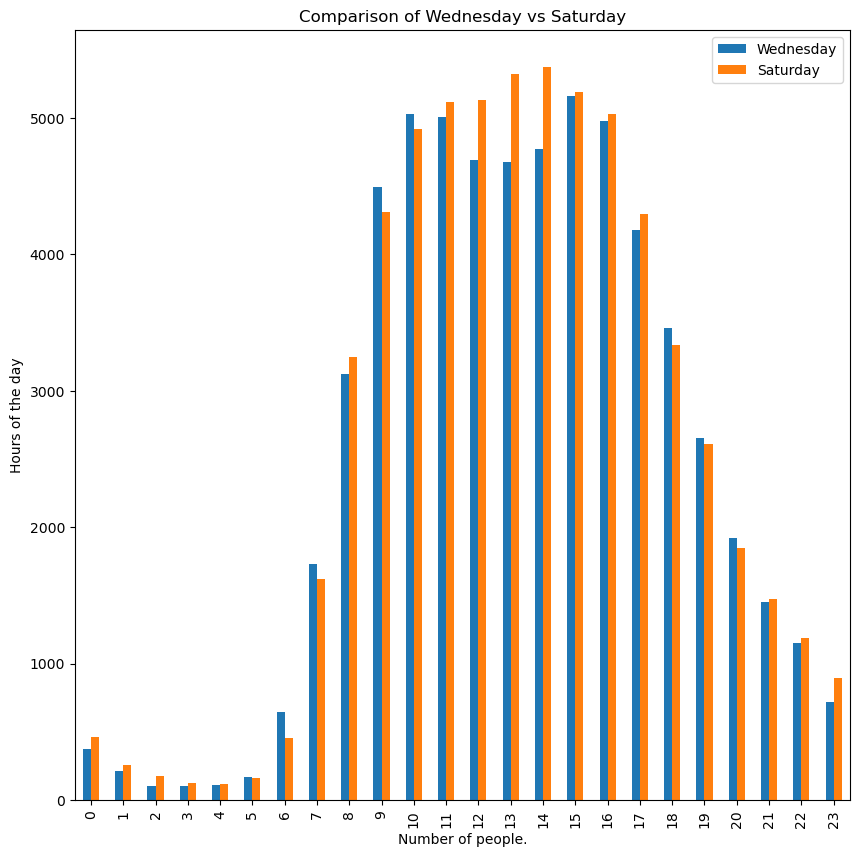

In [43]:
mys_comp2.plot(kind='bar', #A chart is created for Wednesday vs Saturday.
        title='Comparison of Wednesday vs Saturday',  
        xlabel='Number of people.', 
        ylabel='Hours of the day',
              figsize=[10, 10] )

plt.legend(['Wednesday', 'Saturday'])
plt.show()

A very similar behavior is observed on Wednesdays and Saturdays, but the difference is that Saturday has a higher influx. Another point is that there are 3 time slots where Wednesday surpasses Saturday. These time slots are from 5:00 AM to 7:00 AM, from 9:00 AM to 10:00 AM, and from 6:00 PM to 8:00 PM.
Another difference observed is that both days have a bell-shaped flow, starting with a low influx, then rising almost five times higher than the beginning, and eventually decreasing again.

### [B2] What is the distribution for the number of orders per customer?

In [44]:
deck_val6 = df_orders.groupby('order_number')['user_id'].count() #Grouping of the number of times a customer places n orders based on the customer.
print(deck_val6)
print()
comp1reor = df_orders[df_orders['order_number']== 1] #Validation for the number of orders placed by customers, i.e., how many customers placed only 1 order.
print(comp1reor)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   

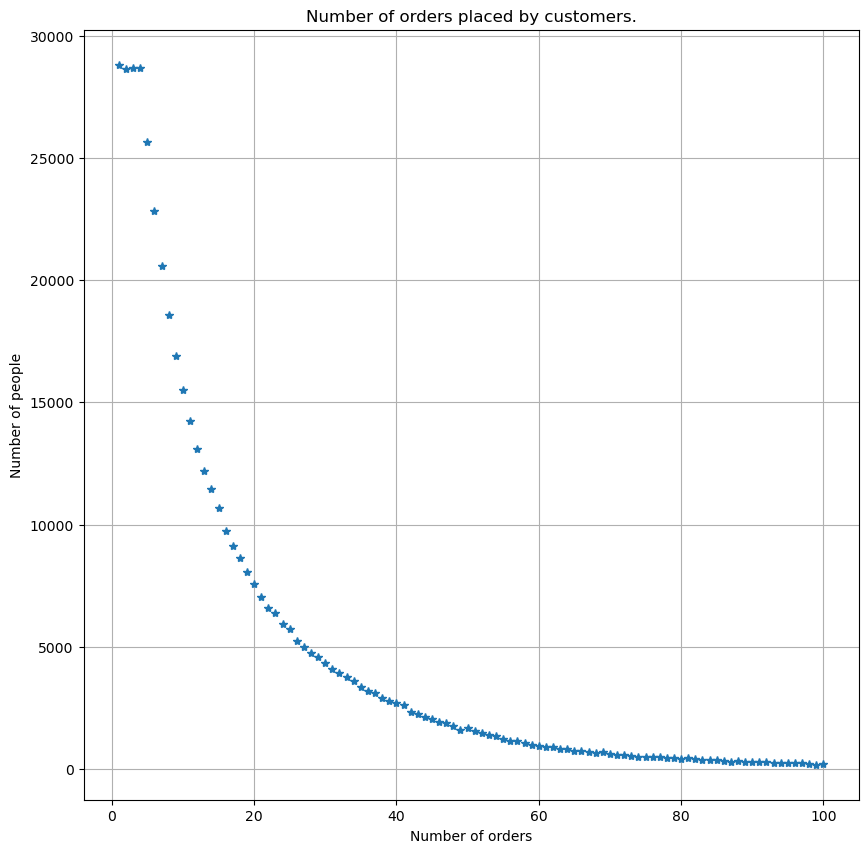

In [45]:
deck_val6.plot(style='*', title='Number of orders placed by customers.', grid=True, xlabel="Number of orders", ylabel="Number of people",
              figsize=[10, 10]) #Data is graphed, and the behavior of these is validated based on the provided chart.
plt.show()

It is observed in the chart that it shows a behavior of reduction or decline, which implies that customers have very low repeat purchase behavior. This is the pattern indicated by the chart: a high purchase volume from a few customers, and there is a strong trend of reduced repeat purchases with fewer customers repeating their orders

### [B3] What are the 20 most popular products? (Display their ID and name)

In [46]:
df_m = df_order_products.merge(df_products, on='product_id', how="left") #A combination of two dataframes is made to include the names.
display(df_m.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7


In [47]:
deck_val7 = df_m.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False) #Grouping of the number of times a product is ordered

In [48]:
deck_val7=deck_val7.head(20) #A variable is created for the top 20 products, as they are organized from highest to lowest
print(deck_val7)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Upon conducting the respective analysis, it is established that the most consumed products are food, organic products, and are focused on fruits.

# [C] Difficult (must be completed to pass)

1. How many items do people usually buy in an order? What is the distribution like?
2. What are the 20 most frequently reordered items? (Display their names and product IDs)
3. For each product, what is the reorder rate? (Number of reorder repetitions / total orders)
4. For each customer, what proportion of the products they ordered had they already ordered before? Calculate the reorder rate for each user instead of for each product.
5. What are the 20 most common items people add first to their carts? (Display product IDs, names, and the number of times they were the first item added to the cart)

### [C1] How many items do people usually buy in an order? What is the distribution like?

In [49]:
df_m2 = df_order_products.merge(df_orders, on='order_id', how="left")
display(df_m2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0
...,...,...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,76414,30,2,15,13.0
4545003,1219554,21914,9,0,163902,19,1,1,3.0
4545004,692640,47766,4,1,597,3,0,20,30.0
4545005,319435,691,8,1,7124,6,5,14,24.0


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

The average number of items usually purchased is:  10.098983215049127


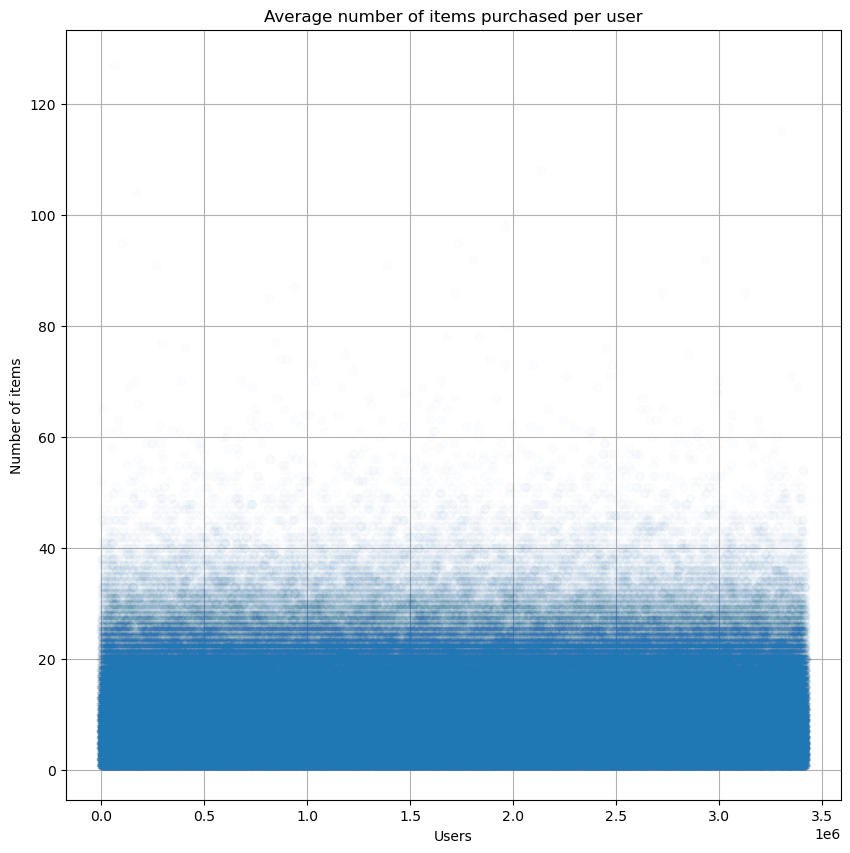

In [50]:
deck_val7 = df_m2.groupby('order_id')['product_id'].count().sort_values(ascending=False)#It is established how many products are purchased per order
deck_val8 = deck_val7.mean() #The average number of products ordered is validated
print(deck_val7)
print()
print("The average number of items usually purchased is: ", deck_val8)
deck_val7.plot(        #plot(): A pandas method that prepares the chart with the data.
        title='Average number of items purchased per user', # The title of the chart is defined.
        style='o',      # The chart style is defined.
        xlabel="Users",   # The x-axis legend is defined; this is optional.
        ylabel="Number of items",   # The y-axis legend is defined; this is optional.
        grid=True,               # Gridlines are defined.
        figsize=[10, 10], alpha=0.01          # The size of the chart is defined
)


plt.show()
#print(df_m2.loc[df_m2['order_id'] == 1959075])

In [51]:
deck_val7.describe()#The values of the variable are displayed, and the minimum number of products in an order, the maximum number of products in 
#an order, and the average number of items per order are established.

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Data verification is performed, and it is established that the average number of items purchased by customers is 10. Additionally, the minimum number of items purchased by customers is 1, and the maximum number of items purchased is 127.

A chart is created, showing that the largest grouping of the number of items purchased per customer is below 20. A chart is created where points use transparency, and the color focus highlights where the data concentration is evident.

### [C2] What are the 20 most frequently reordered items? (Display their names and product IDs)

In [52]:
df_m3 = df_m.loc[df_m['reordered'] == 1] #The dataframe where the product ID and name are already combined is taken, and it is filtered to 
# include only those that have been reordered.

In [53]:
display(df_m3.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7
10,925051,9421,2,1,ORGANIC RAW MULTIGREEN KOBMBUCHA,31,7


In [54]:
deck_val8 = df_m3.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False) #A count of the product in the orders is performed

In [55]:
deck_val8=deck_val8.head(20)

print(deck_val8)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64


Upon conducting the respective analysis, it is established that the most consumed products, which are reordered, are food products, organic items, and they are focused on fruits.

### [C3] For each product, what is the proportion of times it is ordered and reordered?

In [56]:
deck_val9 = df_m.groupby(by =['product_id', 'product_name'])['reordered'].count().sort_values(ascending=False) #The product count is established.
deck_val10 = deck_val9.sum() #A total count of the products is performed.

deck_val11 = deck_val9 / deck_val10 #The proportion per product is established.

In [57]:
#print(deck_val9)
#print()
#print(deck_val10)
#print()
print(deck_val11)


product_id  product_name                                          
24852       BANANA                                                    1.453243e-02
13176       BAG OF ORGANIC BANANAS                                    1.172649e-02
21137       ORGANIC STRAWBERRIES                                      8.149382e-03
21903       ORGANIC BABY SPINACH                                      7.474356e-03
47209       ORGANIC HASS AVOCADO                                      6.550705e-03
                                                                          ...     
5836        ARCTIC D COD LIVER OIL LEMON                              2.200217e-07
43573       WHISK- 10 INCH                                            2.200217e-07
43570       QUESO COTIJA                                              2.200217e-07
36174       WHOLE PINTO BEANS                                         2.200217e-07
41403       EXTRA RICH & THICK SPAGHETTI SAUCE SPICES & SEASONINGS    2.200217e-07
Name: reordered, Len

In [58]:
deck_val12 = df_m.groupby(by =['product_id', 'product_name'])['reordered'].mean().sort_values(ascending=False)#The average for reordering it is established
print()
print(deck_val12)


product_id  product_name                                                                 
14721       BONE STRENGTH TAKE CARE                                                          1.0
20949       VANILLA SANDWICH COOKIES                                                         1.0
6723        PALMIERS- PETITE                                                                 1.0
6732        NATURALLY SPARKLING MINERAL WATER                                                1.0
45088       CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & OLIVE OIL INFUSION                 1.0
                                                                                            ... 
10485       CARAMEL APPLE POP                                                                0.0
37690       CALYPSO FRESH 2X CONCENTRATED SCENTSATIONS 166 LOADS LIQUID LAUNDRY DETERGENT    0.0
10484       AVOCADO AND GREENS                                                               0.0
10474       NUSTEVIA WHITE STEVIA PO

The proportion for each product to be reordered is established. Based on the information, it is evident that the product BANANA with product_id 24852 has a 1.45% chance of being selected in an order and a 1% chance of being reordered in the next purchase. This is specified for this product, and similarly for the other products

### [C4] For each customer, what proportion of their products had they already ordered?

In [59]:
df_mp = df_m2.loc[df_m2['reordered'] == 1]

deck_val13 = df_mp.groupby('user_id')['reordered'].count().sort_values(ascending=False)
#display(df_mp)

In this context, I perform a merge of the instacart_orders dataframe and the order_products dataframe. Based on this, the data is grouped by customer and product, and the average reorder rate is calculated.
I align with what you mentioned and make the necessary adjustments, I’ll be waiting to see if it’s addressed correctly. The specific dataframe is taken, and a filter is applied to keep only the reordered products. Once this is done, a filter is applied by customer for reordered products (1). Then, the data is filtered by user_id, and a count is performed to determine how many times they reorder.

In [60]:
prop_reord = df_m2.groupby('user_id')['reordered'].mean().sort_values(ascending=False)
display(prop_reord)

user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64

In [61]:
print(deck_val13)

user_id
103634    477
164055    449
137629    444
33731     437
59819     436
         ... 
77356       1
77348       1
193229      1
77324       1
2           1
Name: reordered, Length: 132991, dtype: int64


It is confirmed that the customer has a certain number of reorders, and these have the most weight.

### [C5] What are the 20 most common items that people add first to their carts?

In [62]:
display(df_m.head(10)) #The values from the combined dataframe are shown, where the filtering should be done based on the product that is chosen first.

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7


In [63]:
df_m5 = df_m.loc[df_m['add_to_cart_order'] == 1] #Filter the dataframe with products that are selected first
display(df_m5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
14,1961225,37553,1,1,ICED COFFEE LIGHTLY SWEET,26,7
16,639939,10017,1,1,TILAPIA FILET,39,12
23,750040,8518,1,0,ORGANIC RED ONION,83,4
...,...,...,...,...,...,...,...
4544978,1759009,46175,1,0,HALF BAKED® ICE CREAM,37,1
4544989,115427,20842,1,1,TOTAL 0% GREEK YOGURT,120,16
4544990,2049780,28576,1,1,VANILLA BEAN CHIA POD,120,16
4544997,2300092,10017,1,0,TILAPIA FILET,39,12


In [64]:
deck_val14 = df_m5.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)#Count the product per order.
deck_val14=deck_val14.head(20) #The top 20 are displayed and assigned to new variables

print(deck_val14)

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

The top 20 items that are chosen first in the carts for any order are displayed. It is evident that most of them are food items (fruits and vegetables), and beverages are in second place.

### General Conclusion of the Project:

This project begins with multiple dataframes to perform analysis and data merging.

    - The first step involves general data validation, cleaning, and confirmation.
    - Various functions are used to cross-check information, clean, and adjust the data.
    - Finally, all analysis and dataframe merging are conducted to clarify any doubts, supported by graphs that visually clarify results and enable decision-making. It establishes:
        - Consumption patterns: The star product required in purchases is identified (24852 - BANANA), which was the most requested item in general orders. In orders with reorders, it showed the same behavior and was the most relevant item included in the shopping cart.
        - User behavior patterns: Peaks are identified, showing when the highest number of orders are made (time frame from 10:00 AM to 2:00 PM). The day with the highest flow is Sunday, and the average time customers take to place another order is established.

The overall flow established in the project enables:

- Decision-making.
- Process improvement.
- Resource allocation.
- Maximization of profits.